## The Sparks Foundation: GRIP APRIL-2023
## Data Science & Business Analytics Intern
## Name: Shanmugam B
## Task-3: Exploratory Data Analysis - Retail

## Objective: 
  - Perform ‘Exploratory Data Analysis(EDA)’ on dataset ‘SampleSuperstore’ and As a business manager,try to find out the weak areas where you can work to make more profit.
  - Start by exploring the dataset using various plots and statistics to gain insights into the data.


## Importing all the required libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
print("Superstore dataset loaded successfuly")

Superstore dataset loaded successfuly


# Exploratory Data Analysis


## Data Preprocessing

In [3]:
# displaying first 5 records from the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# displaying last 5 records from the dataset
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
# get the dimensions of dataset
df.shape

(9994, 13)

In [6]:
# get the brief description about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [7]:
# gives statistical description about dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# check for null values in dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# check for duplicates data
df.duplicated().sum()

17

In [10]:
# drop the duplicate rows of data from dataset
df.drop_duplicates(inplace = True)   

In [11]:
# check for duplicate data again and the dimensions of array dataset after dropping

print(df.duplicated().sum())
print(df.shape)

0
(9977, 13)


## Data Visualization

##  Sales Analysis between low Priced Products vs High priced Products

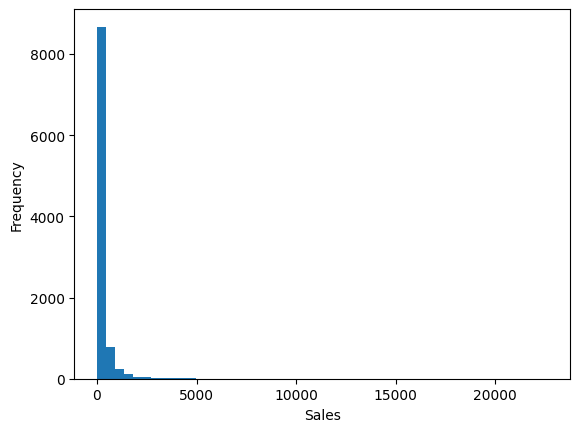

In [12]:
plt.hist(df['Sales'], bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

- The histogram shows that the bin with the value of 0 has the highest frequency (i.e., the most number of sales fall into the bin with the value of 0), and the frequency of the bins with higher values decrease constantly, it suggests that a large portion of the sales fall into the lower range of values, while the sales with higher values are less common.


## Ship Mode wise Sale Analysis

In [13]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

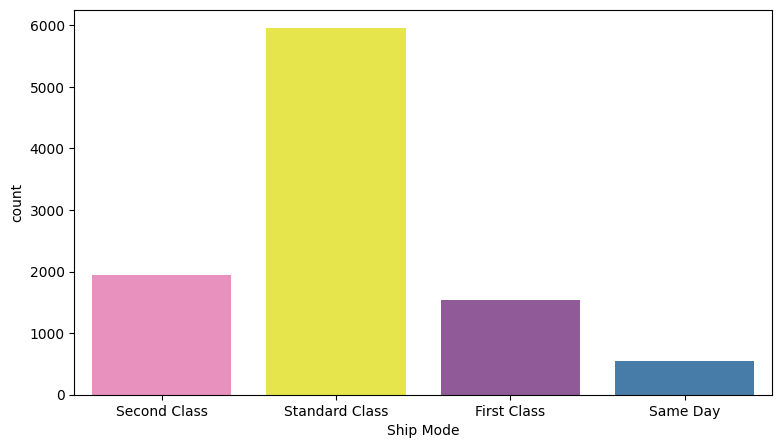

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(x="Ship Mode", data=df, palette="Set1_r")
plt.show()


- Standard Class is most opted Ship Mode and Same Day is least opted Ship Mode in Superstore.

## Region wise Sale Analysis

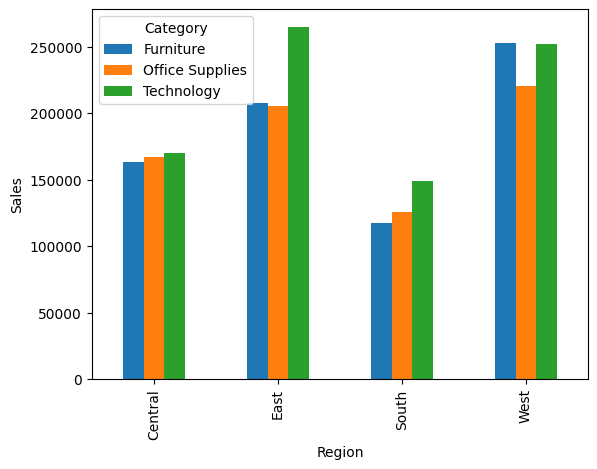

In [15]:
df.groupby(['Region', 'Category'])['Sales'].sum().unstack().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


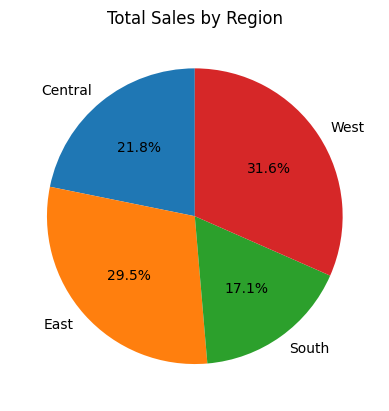

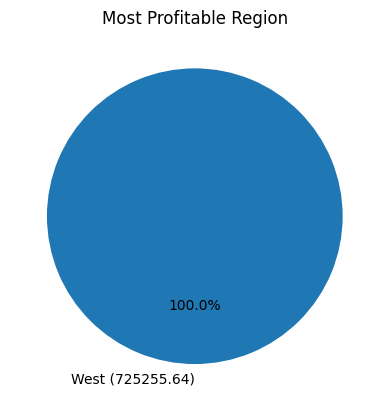

In [18]:
import matplotlib.pyplot as plt

# Create a list of sales values for the most profitable region
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region_sorted = sales_by_region.sort_values(ascending=False)
sales_values = sales_by_region_sorted.values[:1]

# Create a list of labels for the most profitable region
region_labels = [f"{sales_by_region_sorted.index[0]} ({sales_values[0]:.2f})"]

# Create a pie chart of total sales by region
plt.pie(sales_by_region.values, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Region')
plt.show()

# Create a pie chart of the most profitable region
plt.pie(sales_values, labels=region_labels, autopct='%1.1f%%', startangle=90)
plt.title('Most Profitable Region')
plt.show()


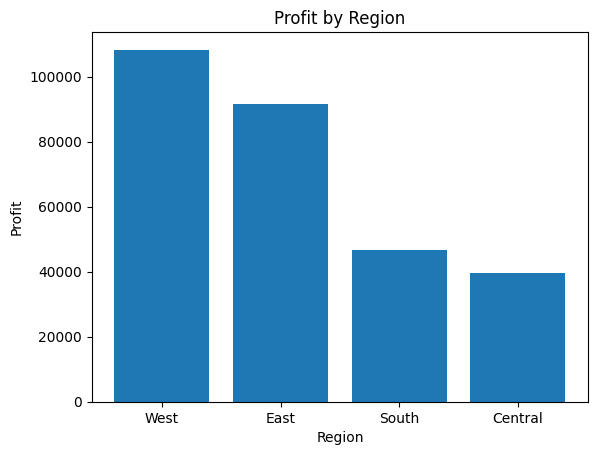

In [19]:
profit_by_region = df.groupby(['Region'])['Profit'].sum().sort_values(ascending=False)
plt.bar(profit_by_region.index, profit_by_region.values)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()


### Region wise Ship Mode Analysis

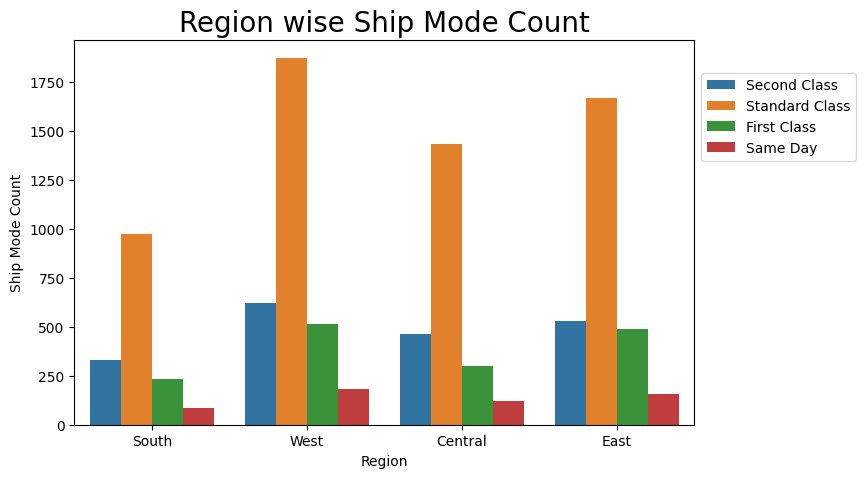

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x="Region", hue="Ship Mode", data=df)
plt.title("Region wise Ship Mode Count", fontsize=20)
plt.ylabel("Ship Mode Count")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))
plt.show()

## City wise and State wise Sale Analysis

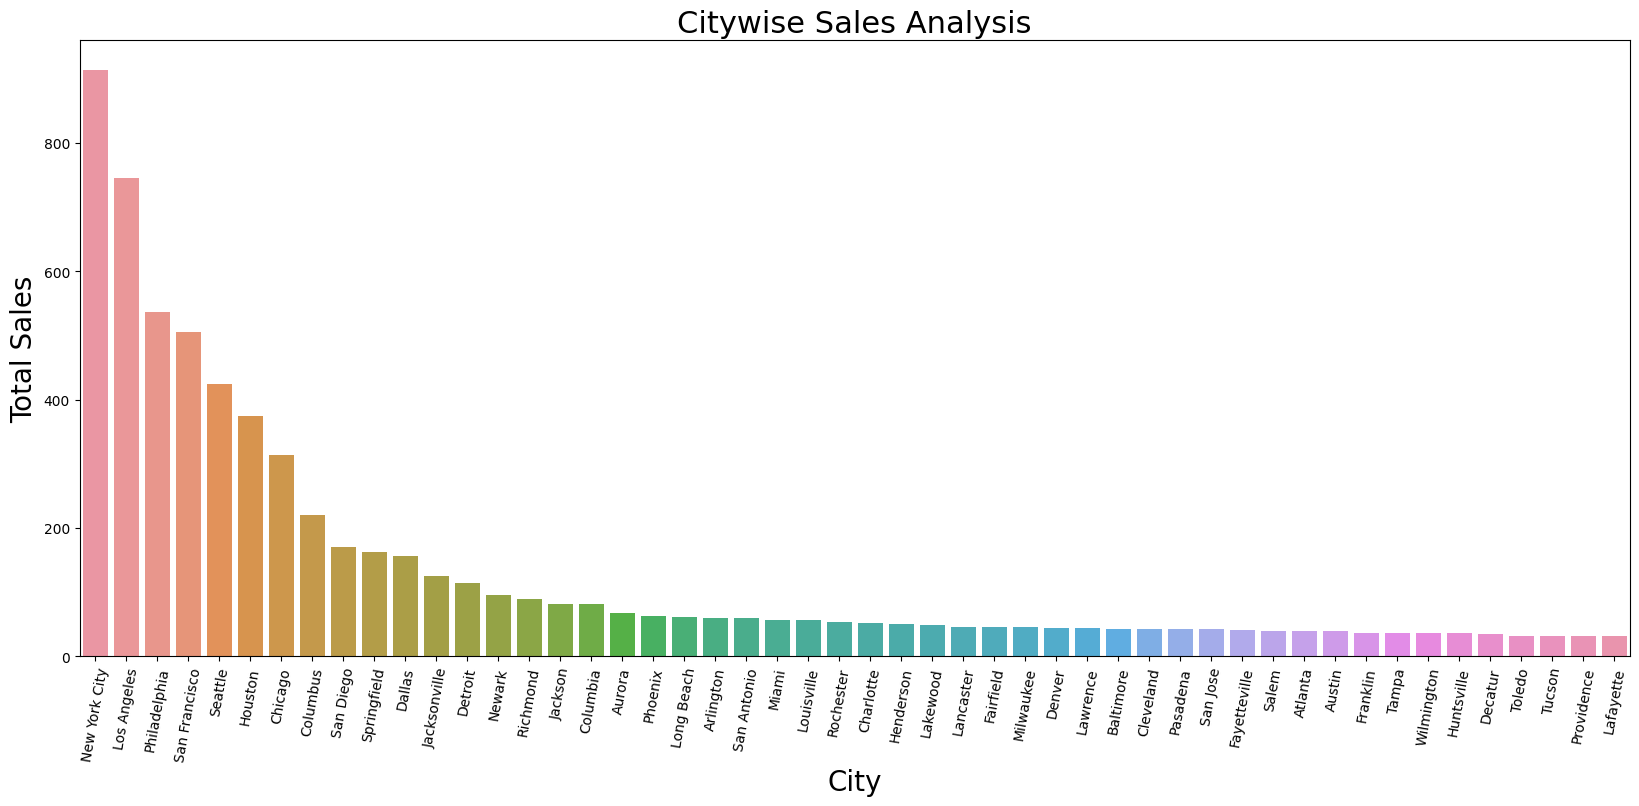

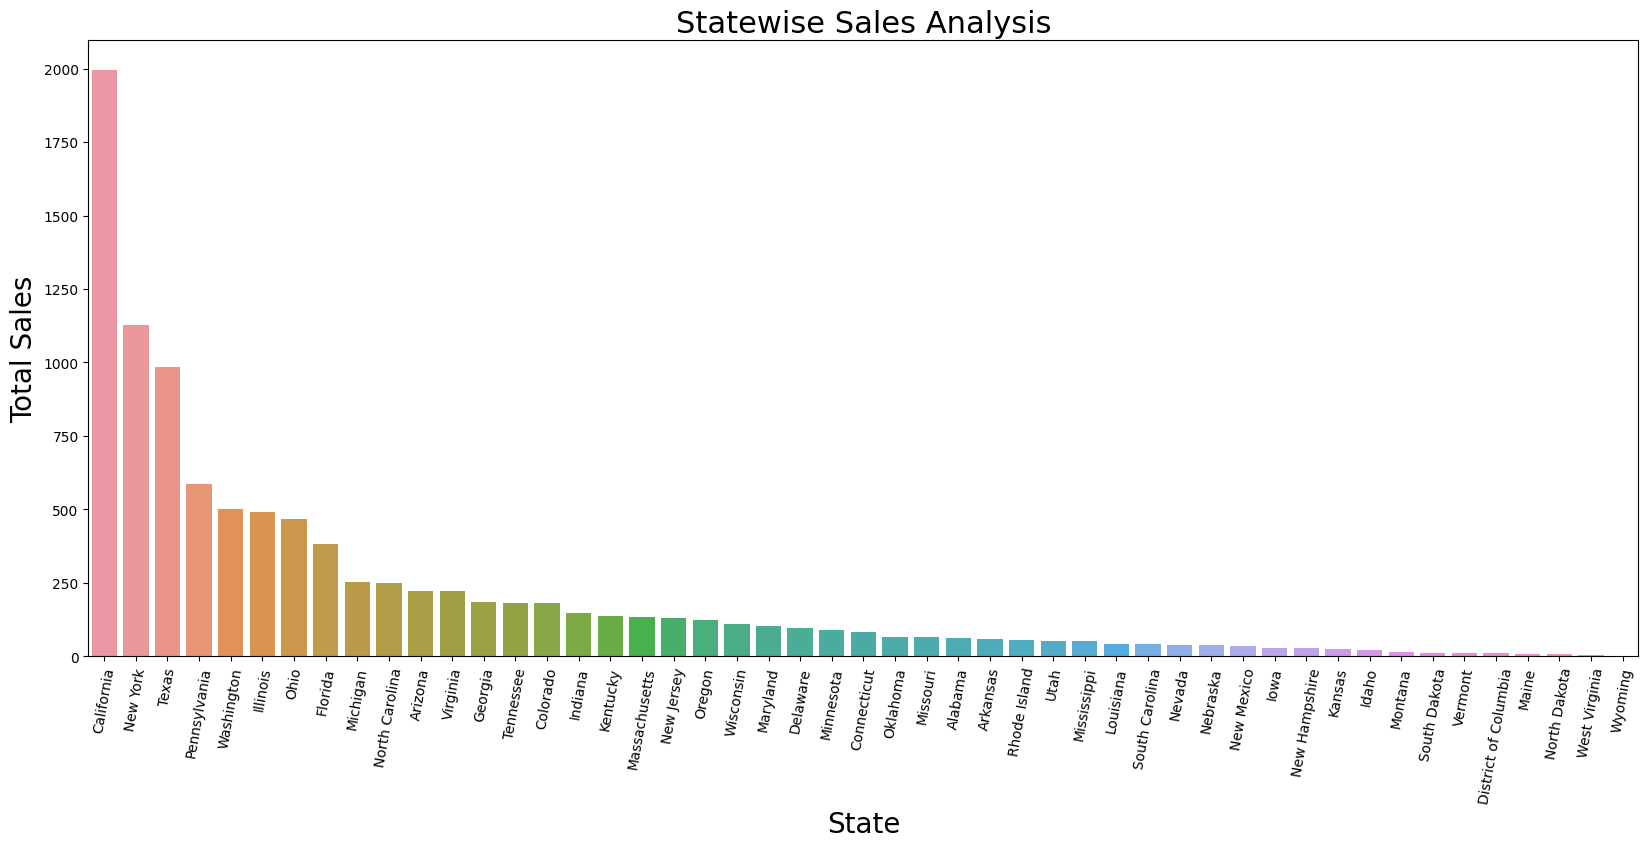

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sales by city and sum
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()

# Group sales by city and sum
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()

# Sort by sales in descending order
sales_by_city = sales_by_city.sort_values('Sales', ascending=False)

# Plot bar chart of sales by city
plt.figure(figsize=(20,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=80)
plt.xlabel('City', fontsize = 20)
plt.ylabel('Total Sales', fontsize = 20)
plt.title('Citywise Sales Analysis', fontsize = 22)
plt.show()


# Plot bar chart of sales by state
plt.figure(figsize=(20,8))
sns.countplot(x=df['State'], order=(df['State'].value_counts().head(50)).index)
plt.xticks(rotation=80)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Total Sales', fontsize = 20)
plt.title('Statewise Sales Analysis', fontsize = 22)
plt.show()

- New York City has highest count of buyers followed by Los Angeles and then by Philadelphia.
- California, New York, Texas has highest count of sales whereas Wyoming has least count.

## Segment wise Sale Analysis

In [22]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

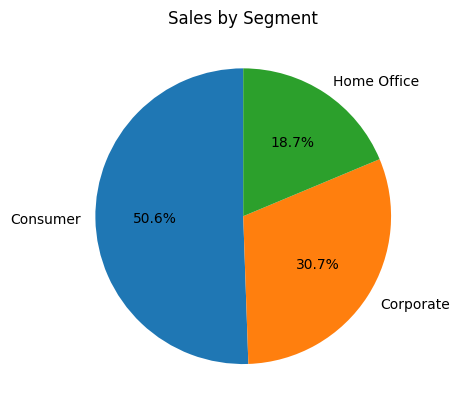

In [23]:
# Calculate total sales by segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()

# Create pie chart
plt.pie(sales_by_segment.values, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Segment')
plt.show()


- Consumer sales are 50.6% which is highest amongst all and lowest is of Home Office with 18.7%.

## Sub-Category wise Analysis

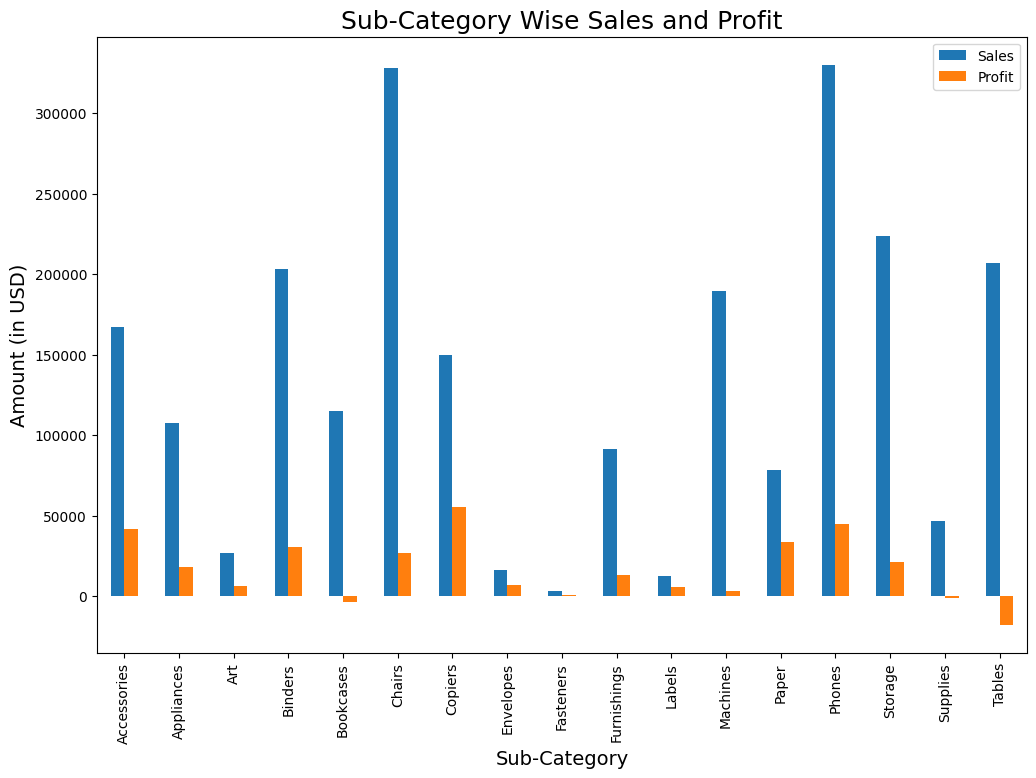

In [24]:
# Group by sub-category and calculate sum of sales and profit
subcat_sales_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()

# Create a grouped bar chart
subcat_sales_profit.plot(kind='bar', figsize=(12,8))

# Add titles and labels
plt.title('Sub-Category Wise Sales and Profit', fontsize=18)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Amount (in USD)', fontsize=14)

# Show the plot
plt.show()


In [25]:
scsp = df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by=["Profit"], ascending = False)
loss_subcategories = scsp[scsp["Profit"] < 0].index.tolist()
if len(loss_subcategories) > 0:
    print("The following subcategories have incurred a loss:")
    print(loss_subcategories)
else:
    print("All subcategories have generated profit.")


The following subcategories have incurred a loss:
['Supplies', 'Bookcases', 'Tables']


- Papers shows highest profit with moderate sales

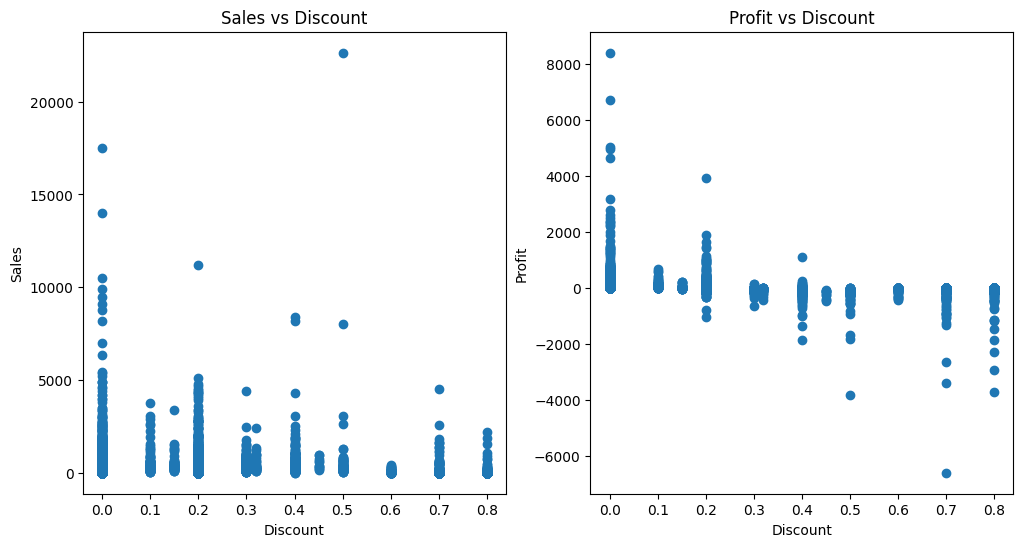

In [26]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Sales vs Discount
ax1.scatter(df['Discount'], df['Sales'])
ax1.set_xlabel('Discount')
ax1.set_ylabel('Sales')
ax1.set_title('Sales vs Discount')

# Profit vs Discount
ax2.scatter(df['Discount'], df['Profit'])
ax2.set_xlabel('Discount')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Discount')

plt.show()


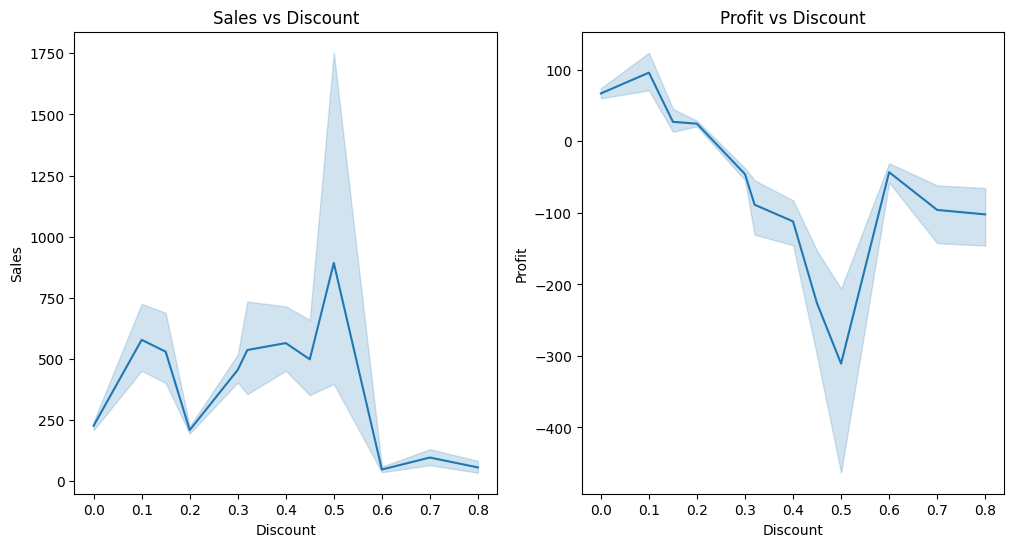

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.lineplot(x='Discount', y='Sales', data=df, ax=ax1)
ax1.set_title('Sales vs Discount')
ax1.set_xlabel('Discount')
ax1.set_ylabel('Sales')

sns.lineplot(x='Discount', y='Profit', data=df, ax=ax2)
ax2.set_title('Profit vs Discount')
ax2.set_xlabel('Discount')
ax2.set_ylabel('Profit')
plt.show()


- Discount is inversely proportional to Profit(i.e. higher discount implies low profit amount and even loss(negative profit)). 
 - Discount and Sales have a lesser correlation but as Discount increases, Sales decreases.


## Conclusion

- To achieve sustained growth in the business, it's important to focus on areas where there is loss, low sales, negative effects of discounts, and least preferred products.

- We should minimize discounts as they result in decreased profits and reduced sales.

- The business should focus more on the cities with the most buyers and maximum sales and profit, namely "California" and "New York."

- There is potential to increase sales and profit by focusing on the "Office Supplies" category.

- Standard Class should be prioritized as it brings in the most profit and sales.

- The sub-categories "Fasteners", "Labels", and "Art" have low sales, and the business should concentrate more on these to improve sales.

- Sales are highest in the Western region followed by the Eastern region, and increasing sales in these regions can result in higher profits.

- To increase sales and profits, the business should prioritize the "Consumer" segment.

- To increase sales in specific states, targeted marketing strategies should be implemented.